Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.2280 - loss: 2.1603 - val_accuracy: 0.4679 - val_loss: 1.5973
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4379 - loss: 1.6191 - val_accuracy: 0.5085 - val_loss: 1.4500
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4784 - loss: 1.4946 - val_accuracy: 0.5255 - val_loss: 1.3839
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5046 - loss: 1.4246 - val_accuracy: 0.5391 - val_loss: 1.3364
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5221 - loss: 1.3771 - val_accuracy: 0.5455 - val_loss: 1.3075


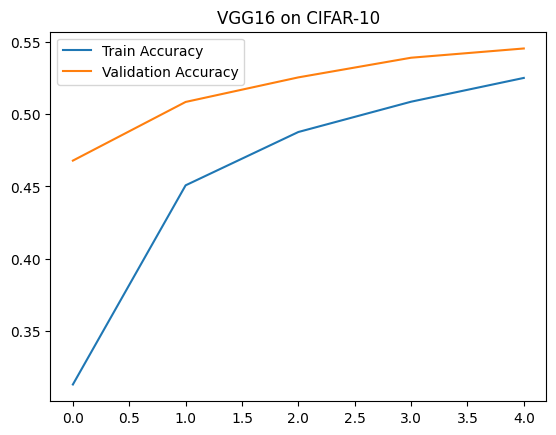

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5448 - loss: 1.3044
Test Accuracy: 0.5455


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0


base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))


base_model.trainable = False


x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="softmax")(x)


model = Model(inputs=base_model.input, outputs=x)


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=5, batch_size=64)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("VGG16 on CIFAR-10")
plt.show()


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")
